# Visualization

This notebook contains code for data visualization and exploration as well as some interesting numbers.

The final report and analysis can be found on: https://github.com/raffyenriquez/Springboard/blob/master/Capstone%20Project/Capstone%20Project%201/Capstone%20Notebook-Visualization.ipynb

In [1]:
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load all the data needed

In [2]:
#load data
df = pd.read_csv('data/kjv.csv')
#check df
df.head()

,field,field.1,field.2,field.3,field.4
0,1001001,1,1,1,In the beginning God created the heaven and th...
1,1001002,1,1,2,"And the earth was without form, and void; and ..."
2,1001003,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,1,1,4,"And God saw the light, that it was good: and G..."
4,1001005,1,1,5,"And God called the light Day, and the darkness..."


In [3]:
#rename columns
df = df.rename(columns = {'field': 'Code',
                          'field.1': 'Book',
                          'field.2': 'Chapter',
                          'field.3': 'Verse', 
                          'field.4': 'Words'})
df.head()

,Code,Book,Chapter,Verse,Words
0,1001001,1,1,1,In the beginning God created the heaven and th...
1,1001002,1,1,2,"And the earth was without form, and void; and ..."
2,1001003,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,1,1,4,"And God saw the light, that it was good: and G..."
4,1001005,1,1,5,"And God called the light Day, and the darkness..."


In [4]:
#there shouln't be any null values, but let's check
pd.isnull(df).sum()

Code       0
Book       0
Chapter    0
Verse      0
Words      0
dtype: int64

In [5]:
#load titles data
titles = pd.read_csv('data/key_english.csv')
#check titles dataframe
titles.head()

,field,field.1,field.2,field.3
0,1,Genesis,OT,1
1,2,Exodus,OT,1
2,3,Leviticus,OT,1
3,4,Numbers,OT,1
4,5,Deuteronomy,OT,1


In [6]:
#rename columns
titles = titles.rename(columns = {'field': 'Book', 
                                  'field.1': 'Title',
                                  'field.2': 'OT/NT',
                                  'field.3': 'Genre'})
titles.head()

,Book,Title,OT/NT,Genre
0,1,Genesis,OT,1
1,2,Exodus,OT,1
2,3,Leviticus,OT,1
3,4,Numbers,OT,1
4,5,Deuteronomy,OT,1


In [7]:
#load genre data
genre = pd.read_csv('data/key_genre_english.csv')
#check genre dataframe
genre.head()

,field,field.1
0,1,Law
1,2,History
2,3,Wisdom
3,4,Prophets
4,5,Gospels


In [8]:
#rename columns
genre = genre.rename(columns = {'field': 'Genre', 
                                'field.1': 'GenreLabel'})
genre.head()

,Genre,GenreLabel
0,1,Law
1,2,History
2,3,Wisdom
3,4,Prophets
4,5,Gospels


In [9]:
#merge titles with genre
merge = titles.merge(genre)
merge.drop(merge.columns[[3]], axis=1, inplace=True)
merge.head()

,Book,Title,OT/NT,GenreLabel
0,1,Genesis,OT,Law
1,2,Exodus,OT,Law
2,3,Leviticus,OT,Law
3,4,Numbers,OT,Law
4,5,Deuteronomy,OT,Law


In [10]:
#merge merge with df
complete_df = df.merge(merge)
complete_df.head()

,Code,Book,Chapter,Verse,Words,Title,OT/NT,GenreLabel
0,1001001,1,1,1,In the beginning God created the heaven and th...,Genesis,OT,Law
1,1001002,1,1,2,"And the earth was without form, and void; and ...",Genesis,OT,Law
2,1001003,1,1,3,"And God said, Let there be light: and there wa...",Genesis,OT,Law
3,1001004,1,1,4,"And God saw the light, that it was good: and G...",Genesis,OT,Law
4,1001005,1,1,5,"And God called the light Day, and the darkness...",Genesis,OT,Law


In [11]:
complete_df.shape

(31103, 8)

In [12]:
#rearrannge columns
complete_df = complete_df[['Code', 'Title', 'OT/NT', 'GenreLabel', 'Book', 'Chapter', 'Verse', 'Words']]
complete_df.head()

,Code,Title,OT/NT,GenreLabel,Book,Chapter,Verse,Words
0,1001001,Genesis,OT,Law,1,1,1,In the beginning God created the heaven and th...
1,1001002,Genesis,OT,Law,1,1,2,"And the earth was without form, and void; and ..."
2,1001003,Genesis,OT,Law,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,Genesis,OT,Law,1,1,4,"And God saw the light, that it was good: and G..."
4,1001005,Genesis,OT,Law,1,1,5,"And God called the light Day, and the darkness..."


## Transform the data

In [13]:
#separate words and stack in a column
vw = complete_df['Words'].str.split(' ', expand=True).stack()
#remove punctation marks
vw = vw.apply(lambda x:''.join([i for i in x if i not in string.punctuation]))
#to match the index to the verse it came from
vw.index = vw.index.droplevel(1)
#name column
vw.name = "VerseWords"
#join new column to old dataframe
df_vw = complete_df.join(vw)
#remove Words column
df_vw.drop(df_vw.columns[[7]], axis=1, inplace=True)
#check df_vw
df_vw.head()

,Code,Title,OT/NT,GenreLabel,Book,Chapter,Verse,VerseWords
0,1001001,Genesis,OT,Law,1,1,1,In
0,1001001,Genesis,OT,Law,1,1,1,the
0,1001001,Genesis,OT,Law,1,1,1,beginning
0,1001001,Genesis,OT,Law,1,1,1,God
0,1001001,Genesis,OT,Law,1,1,1,created


In [14]:
#change all strings to lower case letters
lower = df_vw['VerseWords'].str.lower()
#name column
lower.name = "VerseWords"
#join new column to original dataframe
df_vw_lower = complete_df.join(lower)
#remove Words column
df_vw_lower.drop(df_vw_lower.columns[[7]], axis=1, inplace=True)
#check df_vw_lower
df_vw_lower.head()

,Code,Title,OT/NT,GenreLabel,Book,Chapter,Verse,VerseWords
0,1001001,Genesis,OT,Law,1,1,1,in
0,1001001,Genesis,OT,Law,1,1,1,the
0,1001001,Genesis,OT,Law,1,1,1,beginning
0,1001001,Genesis,OT,Law,1,1,1,god
0,1001001,Genesis,OT,Law,1,1,1,created


### Functions created

In [15]:
#viewing function to display entire result
def view(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [16]:
#list of items for summary
T = ['OT', 'NT']
BT = titles.Title
G = genre.GenreLabel

# word summary and statistics
def summary(x):
    print ('Word Count for ') + r'"' +str(x) + r'"'
    total = df_vw.VerseWords.value_counts().to_dict()
    print "Total: " + str(total[x])

    print ' '
    print ('Testament Totals')
    for t in T:
        testament = df_vw[df_vw['OT/NT'] == t].groupby('OT/NT')['VerseWords'].value_counts().to_dict()
        print t + ": " + str(testament[(t, x)])
    
    print ' '
    print ('Book Totals')
    for bt in BT:
        title = df_vw[df_vw['Title'] == bt].groupby('Title')['VerseWords'].value_counts()
        print bt + ": " + str(title[(bt, x)])
    
    print ' '
    print ('Genre Totals')
    for g in G:
        genre = df_vw[df_vw['GenreLabel'] == g].groupby('GenreLabel')['VerseWords'].value_counts()
        print g + ": " + str(genre[(g, x)])

# word summary and statistics
def summary_lower(x):
    print ('Word Count for ') + r'"' +str(x) + r'"'
    total = df_vw_lower.VerseWords.value_counts().to_dict()
    print "Total: " + str(total[x])

    print ' '
    print ('Testament Totals')
    for t in T:
        testament = df_vw_lower[df_vw_lower['OT/NT'] == t].groupby('OT/NT')['VerseWords'].value_counts().to_dict()
        print t + ": " + str(testament[(t, x)])
    
    print ' '
    print ('Book Totals')
    for bt in BT:
        title = df_vw_lower[df_vw_lower['Title'] == bt].groupby('Title')['VerseWords'].value_counts()
        print bt + ": " + str(title[(bt, x)])
    
    print ' '
    print ('Genre Totals')
    for g in G:
        genre = df_vw_lower[df_vw_lower['GenreLabel'] == g].groupby('GenreLabel')['VerseWords'].value_counts()
        print g + ": " + str(genre[(g, x)])

# What's the top 50 most used word in the Bible?

# Visualization

In [17]:
#counting the top 50 words in the exact way that they appeared
df_vw['VerseWords'].value_counts().to_frame('Counts').reset_index().head(50)

,index,Counts
0,the,62064
1,and,38847
2,of,34427
3,to,13378
4,And,12846
5,that,12577
6,in,12331
7,shall,9760
8,he,9666
9,unto,8940


Observations:
- It's not surprising that 'the' is the most used word
- What I find interesting is that 'he' and 'I' are used more than LORD
- most words look like they mean the same thing
- 'said' is the most used action verb
- Israel is the most used name

Note:
- words will be taken as is, as it is a word-for word translation and LORD and God come from different hebrew/greek words

In [18]:
#use this to check values for a specific word
#summary()

In [19]:
#use this to check values for a specific word
#summary_lower()

Of the top 50 words, the list under woi is what I find interesting

In [20]:
#words of interest from the top 50
woi = ['he', 'I', 'his', 'they', 'him', 
       'LORD', 'them', 'thou', 'thy', 'my',
       'me', 'God', 'said', 'their', 'thee',
       'ye', 'you', 'man', 'Israel']

#woi in lower case, for later use
woi_lower = map(lambda x:x.lower(),woi)

In [21]:
#get totals on interest list
c = df_vw['VerseWords'].value_counts().to_frame('Counts').reset_index()
#rename for consistency
c = c.rename(columns={'index' : 'VerseWords'})
#get counts on interest list
cT = c[c['VerseWords'].isin(woi)]
cT

,VerseWords,Counts
8,he,9666
10,I,8854
11,his,8385
14,they,6970
17,him,6649
19,LORD,6539
20,them,6425
24,thou,4890
26,thy,4450
28,my,4135


In [22]:
# get totals on interest list
c = df_vw_lower['VerseWords'].value_counts().to_frame('Counts').reset_index()
#rename for consistency
c = c.rename(columns={'index' : 'VerseWords'})
#get counts on interest list
cT_lower = c[c['VerseWords'].isin(woi_lower)]
cT_lower

,VerseWords,Counts
6,he,10420
10,i,8854
11,his,8473
13,lord,7830
14,they,7376
17,him,6659
19,them,6430
23,thou,5474
24,thy,4600
26,god,4443


Is there a difference when woi is classified according to Old or New Testament?

In [23]:
#get totals on interest list with OT/NT
c = df_vw.groupby('OT/NT', sort=False)['VerseWords'].value_counts().to_frame('Counts').reset_index()
#get counts on interest list
cT_OTNT = c[c['VerseWords'].isin(woi)]
cT_OTNT

,OT/NT,VerseWords,Counts
8,OT,his,6963
9,OT,he,6799
10,OT,I,6669
11,OT,LORD,6513
16,OT,they,5083
17,OT,them,4727
23,OT,him,4190
24,OT,thou,4142
25,OT,thy,4053
26,OT,my,3551


Is there a difference when woi is classified according to book?

In [24]:
#get totals on interest list with book titles
c = df_vw.groupby('Title', sort=False)['VerseWords'].value_counts().to_frame('Counts').reset_index()
#get results on interest list
cT_Title = c[c['VerseWords'].isin(woi)]
cT_Title

,Title,VerseWords,Counts
4,Genesis,his,651
5,Genesis,he,646
10,Genesis,I,484
11,Genesis,said,477
12,Genesis,him,402
14,Genesis,my,325
18,Genesis,me,291
20,Genesis,thou,272
21,Genesis,thee,268
23,Genesis,thy,267


Is there a difference when an instance of the words are counted once per verse?

In [ ]:
df.word_set

reduce(lambda x, y: x+y, list_of_word_list)

from collections import counter
counter(dfa)

In [25]:
#this returns totals counting an appearance in a verse as 1, takes some time
"""
d = df_vw.VerseWords.unique()
cv = pd.DataFrame()

#(?:\s|^) is a non-capturing group looking for a space character (\s) or the beginning of the string (^).
#(?:\s|$) is a non-capturing group looking for a space character (\s) or the end of the string ($).

for x in d:
    count_total= complete_df[complete_df['Words'].str.contains(r'(?:\s|^)' + x + r'(?:\s|$)')].count()[0]
    cv = cv.append(pd.DataFrame([[x, count_total]], columns =['Word', 'Counts']), ignore_index=True)

cv.head()
"""
#output can be read from:
cv_complete = pd.read_csv('data/verse_total.csv')
del cv_complete['Unnamed: 0']
cv_complete = cv_complete.sort_values('Counts', ascending=False)
cv_complete.head(50)

,Word,Counts
1,the,23641
6,and,20668
16,of,18071
8,And,11929
27,that,9595
82,to,9577
43,in,9224
56,unto,7313
34,he,7057
41,a,6086


Does the change in the way we counted words affected?

In [26]:
#get rows with words of interest
cv_woi = cv_complete[cv_complete['Word'].isin(woi)]
cv_woi

,Word,Counts
34,he,7057
149,I,5973
74,his,5912
176,they,5212
177,LORD,3519
244,thou,3377
342,thy,2971
84,them,2965
284,my,2952
114,their,2757


# Visuals

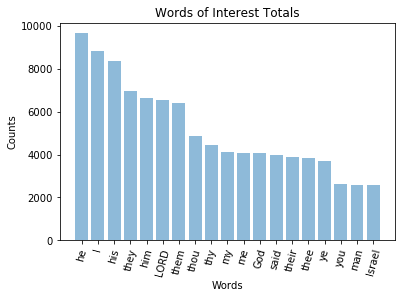

In [27]:
#plot words of interest totals
word = cT['VerseWords']
n = np.arange(len(word))
count = cT['Counts']

plt.bar(n, count, align='center', alpha=0.5)

plt.xticks(n, word, rotation=75)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Words of Interest Totals')
 
plt.show()

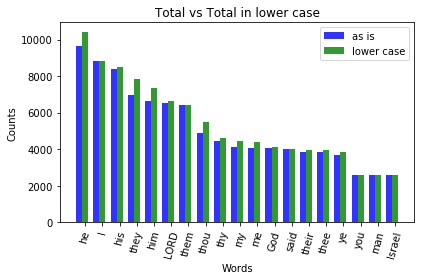

In [28]:
#Total vs Total in lower case
# data to plot
word = cT['VerseWords']
count_cT = cT['Counts']
count_cT_lower = cT_lower['Counts']

# create plot
fig, ax = plt.subplots()
index = np.arange(len(word))
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, count_cT, bar_width,
                 alpha=opacity,
                 color='b',
                 label='as is')
 
rects2 = plt.bar(index + bar_width, count_cT_lower, bar_width,
                 alpha=opacity,
                 color='g',
                 label='lower case')
 
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Total vs Total in lower case')
plt.xticks(index + bar_width, word, rotation=75)
plt.legend()
 
plt.tight_layout()
plt.show()

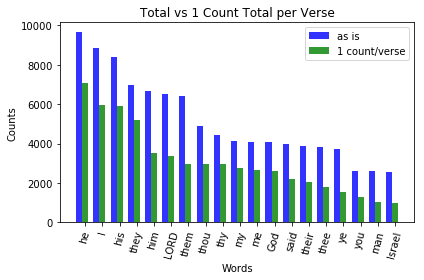

In [29]:
#Total vs 1 Count Total per Verse
# data to plot
word = cT['VerseWords']
count_cT = cT['Counts']
count_cv_woi = cv_woi['Counts']

# create plot
fig, ax = plt.subplots()
index = np.arange(len(word))
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, count_cT, bar_width,
                 alpha=opacity,
                 color='b',
                 label='as is')
 
rects2 = plt.bar(index + bar_width, count_cv_woi, bar_width,
                 alpha=opacity,
                 color='g',
                 label='1 count/verse')
 
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Total vs 1 Count Total per Verse')
plt.xticks(index + bar_width, word, rotation=75)
plt.legend()
 
plt.tight_layout()
plt.show()

In [30]:
#comparison between two words I vs LORD in OT and NT
cT_OTNT_I_LORD = cT_OTNT[cT_OTNT['VerseWords'].isin(['I', 'LORD'])]
cT_OTNT_I_LORD

,OT/NT,VerseWords,Counts
10,OT,I,6669
11,OT,LORD,6513
11537,NT,I,2185
12207,NT,LORD,26


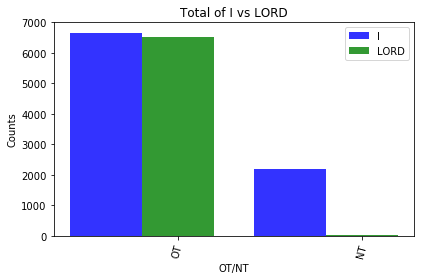

In [31]:
#comparison between two words I vs LORD in OT and NT
# data to plot
OTNT = T
I = cT_OTNT_I_LORD.loc[cT_OTNT_I_LORD['VerseWords'] == 'I', 'Counts']
LORD = cT_OTNT_I_LORD.loc[cT_OTNT_I_LORD['VerseWords'] == 'LORD', 'Counts']

# create plot
fig, ax = plt.subplots()
index = np.arange(len(OTNT))
bar_width = 0.39
opacity = 0.8
 
rects1 = plt.bar(index, I, bar_width,
                 alpha=opacity,
                 color='b',
                 label='I')
 
rects2 = plt.bar(index + bar_width, LORD, bar_width,
                 alpha=opacity,
                 color='g',
                 label='LORD')
 
plt.xlabel('OT/NT')
plt.ylabel('Counts')
plt.title('Total of I vs LORD')
plt.xticks(index + bar_width, OTNT, rotation=75)
plt.legend()
 
plt.tight_layout()
plt.show()

In [32]:
#comparison between two words LORD vs God in OT and NT
cT_OTNT_LORD_GOD = cT_OTNT[cT_OTNT['VerseWords'].isin(['LORD', 'God'])]
cT_OTNT_LORD_GOD

,OT/NT,VerseWords,Counts
11,OT,LORD,6513
36,OT,God,2736
11550,NT,God,1349
12207,NT,LORD,26


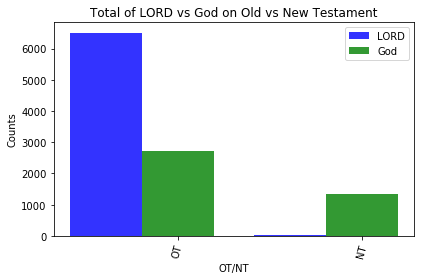

In [33]:
#comparison between two words LORD vs God in OT and NT
# data to plot
OTNT = T
LORD = cT_OTNT_LORD_GOD.loc[cT_OTNT_LORD_GOD['VerseWords'] == 'LORD', 'Counts']
God = cT_OTNT_LORD_GOD.loc[cT_OTNT_LORD_GOD['VerseWords'] == 'God', 'Counts']

# create plot
fig, ax = plt.subplots()
index = np.arange(len(OTNT))
bar_width = 0.39
opacity = 0.8
 
rects1 = plt.bar(index, LORD, bar_width,
                 alpha=opacity,
                 color='b',
                 label='LORD')
 
rects2 = plt.bar(index + bar_width, God, bar_width,
                 alpha=opacity,
                 color='g',
                 label='God')
 
plt.xlabel('OT/NT')
plt.ylabel('Counts')
plt.title('Total of LORD vs God on Old vs New Testament')
plt.xticks(index + bar_width, OTNT, rotation=75)
plt.legend()
 
plt.tight_layout()
plt.show()

In [34]:
#get only I and LORD from VerseWords
cT_Title_I_LORD = cT_Title[cT_Title['VerseWords'].isin(['I', 'LORD'])]

#separate dataframes to place 0 counts on the data where no value is available
cT_I = cT_Title_I_LORD[cT_Title_I_LORD['VerseWords'] == 'I']
cT_LORD = cT_Title_I_LORD[cT_Title_I_LORD['VerseWords'] == 'LORD']

#merge to match data then fill null values
cT_ILORD = pd.merge(cT_I , cT_LORD , how='left', on=['Title'])
cT_ILORD.loc[(cT_ILORD['VerseWords_y'].isnull()) & (cT_ILORD.Title == BT), 'VerseWords_y']= 'LORD'
cT_ILORD.Counts_y.fillna(0, inplace=True)
cT_LORD = cT_ILORD[['Title', 'VerseWords_y', 'Counts_y']]
cT_LORD = cT_LORD.rename(columns = {'VerseWords_y': 'VerseWords', 'Counts_y': 'Counts'})

#merge to create a new dataframe with same dimensions
cT_Title_I_LORD = pd.merge(cT_I , cT_LORD , how='outer', on=['Title', 'VerseWords', 'Counts'])
cT_Title_I_LORD.head()

,Title,VerseWords,Counts
0,Genesis,I,484
1,Exodus,I,270
2,Leviticus,I,128
3,Numbers,I,158
4,Deuteronomy,I,223


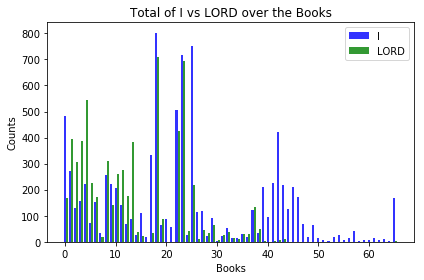

In [35]:
#comparison between two words I vs LORD in the books using a bar graph

# create plot
fig, ax = plt.subplots()
book = BT
index = np.arange(len(book))
I = cT_Title_I_LORD.loc[cT_Title_I_LORD['VerseWords'] == 'I', 'Counts']
LORD = cT_Title_I_LORD.loc[cT_Title_I_LORD['VerseWords'] == 'LORD', 'Counts']
bar_width = 0.40
opacity = 0.8
 
rects1 = plt.bar(index, I, bar_width,
                 alpha=opacity,
                 color='b',
                 label='I')
 
rects2 = plt.bar(index + bar_width, LORD, bar_width,
                 alpha=opacity,
                 color='g',
                 label='LORD')
 
plt.xlabel('Books')
plt.ylabel('Counts')
plt.title('Total of I vs LORD over the Books')
#plt.xticks(index + bar_width, book, rotation=75)
plt.legend()
 
plt.tight_layout()
plt.show()

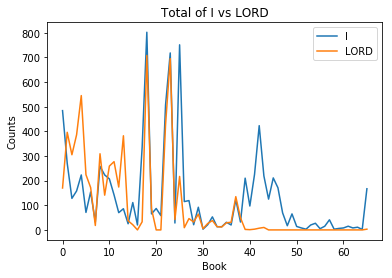

In [36]:
#comparison between two words I vs LORD in the books in a line graph
book = BT
index = np.arange(len(book))
I = cT_Title_I_LORD.loc[cT_Title_I_LORD['VerseWords'] == 'I', 'Counts']
LORD = cT_Title_I_LORD.loc[cT_Title_I_LORD['VerseWords'] == 'LORD', 'Counts']

plt.xlabel('Book')
plt.ylabel('Counts')
plt.title('Total of I vs LORD')
#plt.xticks(index, book, rotation=75)

plt.plot(index, I, label='I')
plt.plot(index, LORD, label='LORD')

plt.legend()

plt.show()

In [37]:
#comparison between I vs he vs they in the Old and New Testament
cT_OTNT_he_I_they = cT_OTNT[cT_OTNT['VerseWords'].isin(['I', 'he', 'they'])]
cT_OTNT_he_I_they

,OT/NT,VerseWords,Counts
9,OT,he,6799
10,OT,I,6669
16,OT,they,5083
11533,NT,he,2867
11537,NT,I,2185
11540,NT,they,1887


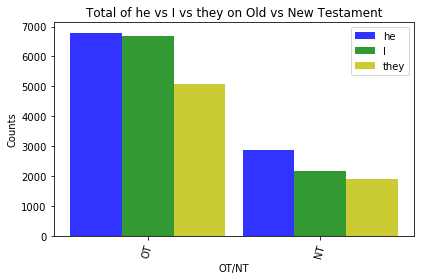

In [38]:
#comparison between I vs he vs they in the Old and New Testament

# data to plot
OTNT = T
he = cT_OTNT_he_I_they.loc[cT_OTNT_he_I_they['VerseWords'] == 'he', 'Counts']
I = cT_OTNT_he_I_they.loc[cT_OTNT_he_I_they['VerseWords'] == 'I', 'Counts']
they = cT_OTNT_he_I_they.loc[cT_OTNT_he_I_they['VerseWords'] == 'they', 'Counts']

# create plot
fig, ax = plt.subplots()
index = np.arange(len(OTNT))
bar_width = 0.30
opacity = 0.8
 
rects1 = plt.bar(index, he, bar_width,
                 alpha=opacity,
                 color='b',
                 label='he')
 
rects2 = plt.bar(index + bar_width, I, bar_width,
                 alpha=opacity,
                 color='g',
                 label='I')

rects3 = plt.bar(index + (2 * bar_width), they, bar_width,
                 alpha=opacity,
                 color='y',
                 label='they')

plt.xlabel('OT/NT')
plt.ylabel('Counts')
plt.title('Total of he vs I vs they on Old vs New Testament')
plt.xticks(index + bar_width, OTNT, rotation=75)
plt.legend()
 
plt.tight_layout()
plt.show()

## Numbers

What interesting numbers can we pull out from this?

In [39]:
#unique words, total word count
len(df_vw.VerseWords.unique()), len(df_vw), len(df_vw.VerseWords.unique())/float(len(df_vw))*100

(13719, 789635, 1.7373849943328246)

In [40]:
#words in OT and percentage to total words
len(df_vw[df_vw['OT/NT'] == 'OT']), len(df_vw[df_vw['OT/NT'] == 'OT'])/float(len(df_vw))*100

(609253, 77.15628106656874)

In [41]:
#words in NT and percentage to total words
len(df_vw[df_vw['OT/NT'] == 'NT']),  len(df_vw[df_vw['OT/NT'] == 'NT'])/float(len(df_vw))*100

(180382, 22.84371893343127)

In [61]:
#to get he number of unique words per book and total number of words used
book_s = df_vw.groupby('Title', sort=False)['VerseWords'].value_counts().to_frame('Counts').reset_index()
book_stats = pd.DataFrame()

for x in BT:
    vw_total = (book_s[book_s['Title'] == x]).count()['VerseWords']
    count_total = book_s[book_s['Title'] == x].sum()['Counts']
    book_stats = book_stats.append(pd.DataFrame([[x, vw_total, count_total]], 
                                                columns =['Title', 'vw_total', 'count_total']),
                                   ignore_index=True)

view(book_stats)

              Title  vw_total  count_total
0           Genesis      2648        38265
1            Exodus      2179        32684
2         Leviticus      1492        24543
3           Numbers      2196        32895
4       Deuteronomy      2178        28352
5            Joshua      1712        18852
6            Judges      1794        18966
7              Ruth       558         2574
8          1 Samuel      2031        25047
9          2 Samuel      2009        20599
10          1 Kings      1994        24512
11          2 Kings      1911        23521
12     1 Chronicles      2578        20365
13     2 Chronicles      2138        26069
14             Ezra      1130         7440
15         Nehemiah      1524        10480
16           Esther       828         5630
17              Job      2391        18098
18           Psalms      3174        42684
19         Proverbs      2012        15038
20     Ecclesiastes       955         5580
21  Song of Solomon       700         2658
22         

In [43]:
#statistics of the books, but not really needed
book_stats.describe()

,vw_total,count_total
count,66.000000,66.000000
mean,1265.106061,11964.166667
std,841.020372,12461.060395
min,138.000000,295.000000
25%,558.000000,1992.500000
50%,1014.500000,5847.500000
75%,2005.250000,20540.500000
max,3301.000000,42684.000000


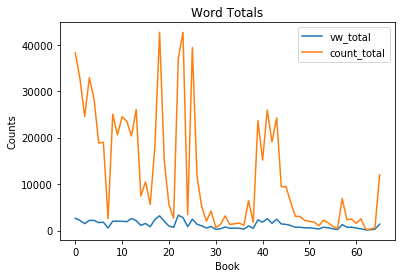

In [44]:
#see the trends of words used
book = BT
index = np.arange(len(book))
vw_t = book_stats['vw_total']
count_t= book_stats['count_total']

plt.xlabel('Book')
plt.ylabel('Counts')
plt.title('Word Totals')
#plt.xticks(index, book, rotation=75)

plt.plot(index, vw_t, label='vw_total')
plt.plot(index, count_t, label='count_total')

plt.legend()

plt.show()

### Data Visualization Questions

Questions asked
- What are the top 50 most words used in the Bible?
- Is there are a difference if all words, regardless of case, are accounted for?
- Is there a difference when woi is classified according to Old or New Testament?
- Is there a difference when woi is classified according to book?
- Is there a difference when an instance of the words are counted once per verse?
- Does the change in the way we counted words affected?
- What interesting numbers can we pull out from this?

Trends investigated
- Words of interest
- I vs LORD
- LORD vs God
- he vs I vs they
- unique words per book as compared to total words used per book

Conclusions
- I’m surprised that ‘he’ and ‘I’ appears more than LORD and God combined. We can say from this, that the Bible is really more about the people in relation to God. 

- Regardless of however the words are counted, the word’s totals are pretty much the same.

- One interesting trend is that on the New Testament, there are less occurrences of the word LORD and there are more occurrences of the word God. It is possible that the name used might have been different but it may refer to the same thing. Another factor to consider is that Jesus is a central character in the New Testament but the name has been excluded because it didn’t crack the top 50, not even the top 100 if the list is expanded.

- The downtrend of the word totals from the Old to the New Testament can be explained by the lesser number of books. When looking for totals, in the New Testament it should be looked at in proportion to the Bible. (~77% for the Old Testament and ~23% for the New Testament)

# Additional Data and Interesting Numbers

In [64]:
complete_df['Words'].value_counts().to_frame().reset_index()

,index,Words
0,"And the LORD spake unto Moses, saying,",72
1,One kid of the goats for a sin offering:,12
2,"And the word of the LORD came unto me, saying,",12
3,"One young bullock, one ram, one lamb of the fi...",12
4,"One golden spoon of ten shekels, full of incense:",10
5,"Moreover the word of the LORD came unto me, sa...",8
6,"And the LORD spake unto Moses and unto Aaron, ...",7
7,"His offering was one silver charger, the weigh...",7
8,"The word of the LORD came again unto me, saying,",6
9,"Again the word of the LORD came unto me, saying,",6


In [71]:
#longest word and shortest word
longest = df_vw.VerseWords.map(len).max()
shortest = df_vw.VerseWords.map(len).min()
for x in df_vw.VerseWords:
    if len(x) == longest:
        print (x)
    if len(x) == shortest:
        print (x)




Mahershalalhashbaz
Mahershalalhashbaz

